# 1. Introduction
### 1.1 Problem Statement

As a data scientist in SmartAd, one of your tasks is to design a reliable hypothesis testing algorithm for the BIO service and to determine whether a recent advertising campaign resulted in a significant lift in brand awareness.

### 1.2 Context
SmartAd is a mobile first advertiser agency. It designs Intuitive touch-enabled advertising. It provides brands with an automated advertising experience via machine learning and creative excellence. Their company is based on the principle of voluntary participation which is proven to increase brand engagement and memorability 10 x more than static alternatives.

SmartAd provides an additional service called Brand Impact Optimiser (BIO), a lightweight questionnaire, served with every campaign to determine the impact of the creative, the ad they design, on various upper funnel metrics, including memorability and brand sentiment.

### 1.3 Metric for Success

### 1.4 Experimental Design

### 1.5 Variable Definitions
* **auction_id:** the unique id of the online user who has been presented the BIO. In standard terminologies this is called an impression id. The user may see the BIO questionnaire but choose not to respond. In that case both the yes and no columns are zero.
* **experiment:** which group the user belongs to - control or exposed.
* **date:** the date in YYYY-MM-DD format
* **hour:** the hour of the day in HH format.
* **device_make:** the name of the type of device the user has e.g. Samsung
* **platform_os:** the id of the OS the user has.
* **browser:** the name of the browser the user uses to see the BIO questionnaire.
* **yes:** 1 if the user chooses the “Yes” radio button for the BIO questionnaire.
* **no:**  if the user chooses the “No” radio button for the BIO questionnaire.

# 2. Data Preparation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline
pd.set_option("display.max.columns", None)
pd.set_option("display.max_colwidth", None)

In [2]:
df = pd.read_csv('ABAdRecall.csv')
df.sample(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
305,090b32d5-a098-4e68-81bd-60325a6898fa,exposed,2020-07-05,21,Generic Smartphone,6,Chrome Mobile,1,0
5745,b516b9dc-880b-45cf-a233-a75b6fba6666,control,2020-07-05,2,Generic Smartphone,6,Chrome Mobile,0,0
162,04ce7ee1-a4be-4c40-82a9-23f255aa3395,control,2020-07-03,15,ELE-L09,6,Facebook,1,0
2946,5eb76d8a-2d41-4fa4-9c53-7f9b1d56dd57,exposed,2020-07-03,10,Generic Smartphone,6,Chrome Mobile,0,0
5683,b3829173-e9b4-4668-8f0c-bd1891514cbf,exposed,2020-07-09,14,Generic Smartphone,6,Chrome Mobile,0,0


In [3]:
# checking shape
df.shape

(8077, 9)

In [4]:
# dropping duplicates, if any
df.drop_duplicates(inplace = True)
df.shape

(8077, 9)

In [5]:
# checking for missing values
df.isna().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

In [6]:
# checking data types
df.dtypes

auction_id     object
experiment     object
date           object
hour            int64
device_make    object
platform_os     int64
browser        object
yes             int64
no              int64
dtype: object

# 3. Exploratory Data Analysis

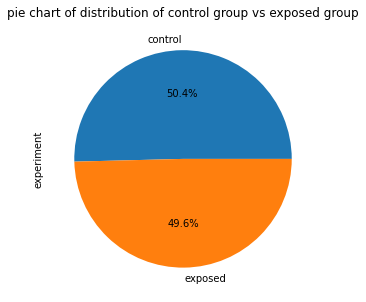

In [7]:
# previewing distribution of control vs exposed
plt.figure(figsize = (5, 5))
df.experiment.value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('pie chart of distribution of control group vs exposed group')
plt.show()

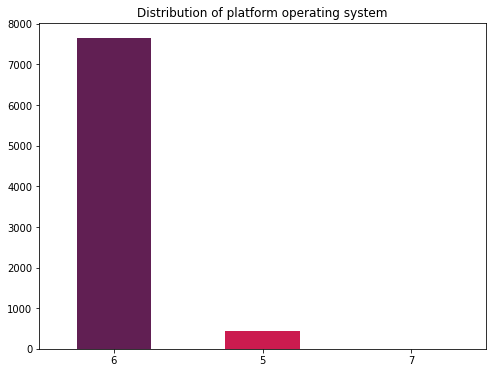

In [8]:
# distribution of platform OS
plt.figure(figsize = (8, 6))
df.platform_os.value_counts().plot(kind = 'bar', rot = 0, 
                                   color = sns.color_palette('rocket', len(df.platform_os.unique())))
plt.title('Distribution of platform operating system')
plt.show()

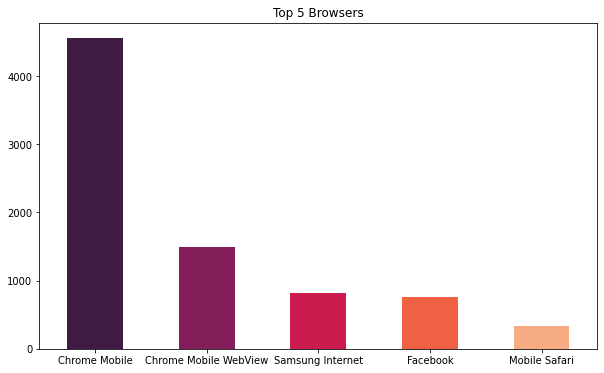

In [9]:
# distribution of top 5 browsers
plt.figure(figsize = (10, 6))
df.browser.value_counts()[:5].plot(kind = 'bar', rot = 0, color = sns.color_palette('rocket', 5))
plt.title("Top 5 Browsers")
plt.show()

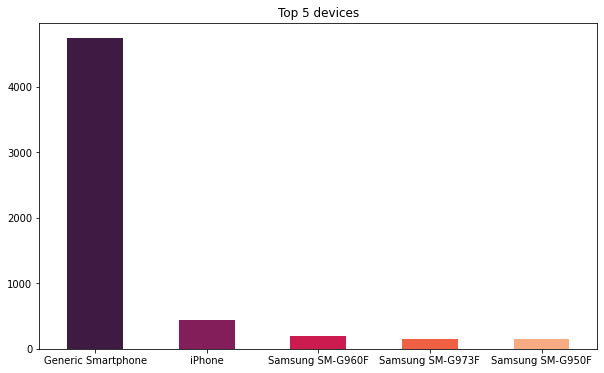

In [10]:
# distribution of top 5 devices
plt.figure(figsize = (10, 6))
df.device_make.value_counts()[:5].plot(kind = 'bar', rot = 0, color = sns.color_palette('rocket', 5))
plt.title("Top 5 devices")
plt.show()

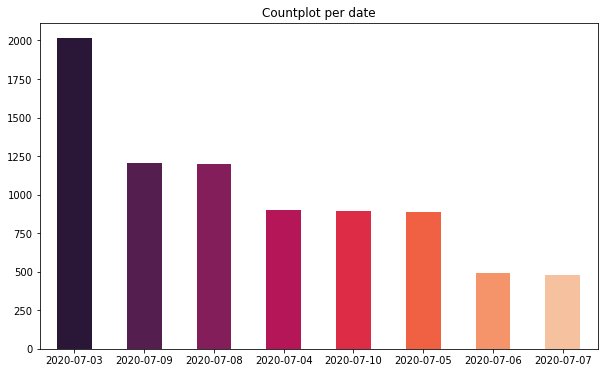

In [11]:
plt.figure(figsize = (10, 6))
df.date.value_counts().plot(kind = 'bar', rot = 0, color = sns.color_palette('rocket', df.date.nunique()))
plt.title("Countplot per date")
plt.show()

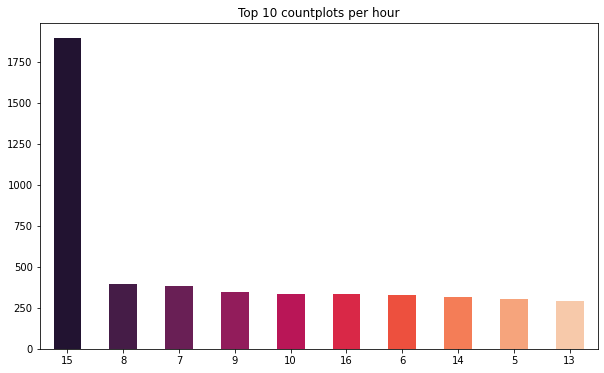

In [12]:
# top 10 hours
plt.figure(figsize = (10, 6))
df.hour.value_counts()[:10].plot(kind = 'bar', rot = 0, color = sns.color_palette('rocket', 10))
plt.title("Top 10 countplots per hour")
plt.show()

In [13]:
# top 3 hours per date
for date in df.date.unique():
    print("Date:", date)
    print(df.loc[df.date == date].hour.value_counts()[:3])
    print()

Date: 2020-07-10
15    78
8     68
9     61
Name: hour, dtype: int64

Date: 2020-07-07
9    46
7    34
8    34
Name: hour, dtype: int64

Date: 2020-07-05
7    72
8    58
9    48
Name: hour, dtype: int64

Date: 2020-07-03
15    1546
10      49
8       44
Name: hour, dtype: int64

Date: 2020-07-09
13    78
8     72
11    69
Name: hour, dtype: int64

Date: 2020-07-04
11    49
15    49
16    48
Name: hour, dtype: int64

Date: 2020-07-06
8     65
7     58
10    54
Name: hour, dtype: int64

Date: 2020-07-08
20    126
15    125
18    116
Name: hour, dtype: int64



In [14]:
# create new variable to store the users' BIO option (yes, no, didn't answer)
conditions = [
    ((df.yes == 0) & (df.no == 0)),
    ((df.yes == 1) & (df.no == 0)),
    ((df.yes == 0) & (df.no == 1)),
]

choices = ['blank', 'yes', 'no']

df['BIO_option'] = np.select(conditions, choices)
df.sample(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,BIO_option
1831,3cadd5e5-8860-4387-84cb-f4c12574d12f,exposed,2020-07-04,3,Samsung SM-G973F,6,Chrome Mobile WebView,0,0,blank
2402,4e7e66c4-0941-479c-9dac-0a97ce786b01,control,2020-07-10,4,Samsung SM-G981B,6,Chrome Mobile WebView,0,0,blank
787,19548e79-bf25-4570-b8ca-54e8e28590f0,exposed,2020-07-03,1,Generic Smartphone,6,Chrome Mobile,0,1,no
6955,dd3be93f-e3b7-4906-b4a2-a51fcbfe8c1a,control,2020-07-10,15,Samsung SM-G975F,6,Facebook,0,0,blank
7653,f24f8392-a62c-456c-94b0-07258ebc3730,exposed,2020-07-03,12,Generic Smartphone,6,Chrome Mobile,0,0,blank


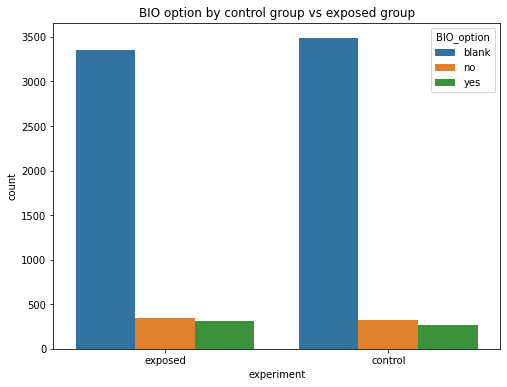

In [15]:
# previewing the distribution of BIO options per experimental group
plt.figure(figsize = (8, 6))
sns.countplot('experiment', hue = 'BIO_option', data = df)
plt.title('BIO option by control group vs exposed group')
plt.show()

In [16]:
# dropping users that didn't answer the questionnaire
df = df[df.BIO_option != 'blank']
df.shape

(1243, 10)

# 4. Hypothesis Testing

**Statistical Question:** Is there a significant lift in brand awareness between the control group and the exposed group?

> H0 : There is no significant lift in brand awareness between the control group and the exposed group. <br>
> HA : There is a significant lift in brand awareness between the control group and the exposed group.

We will set the level of significance (alpha) to 5% (0.05).

In [17]:
from scipy import stats

control = df['experiment'] == 'control'
control = df[control]['yes']
exposed = df['experiment'] == 'exposed'
exposed = df[exposed]['yes']

test_statistic, p_value = stats.ttest_ind(exposed, control)
print("P-value:", p_value)
print()

alpha = 0.05

if (p_value < alpha):
    print("Null hypothesis rejected. There is a significant lift in brand awareness between the control group and the exposed group.")
else:
    print("Failed to reject null hypothesis. There is no significant lift in brand awareness between the control group and the exposed group.")

P-value: 0.5188723218522058

Failed to reject null hypothesis. There is no significant lift in brand awareness between the control group and the exposed group.


# 5. Modeling

In [18]:
# extract day from 'date'
df['date'] =  pd.to_datetime(df['date'], format='%Y-%m-%d')
df['day'] = df.date.dt.strftime('%d')
df.sample(3)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,BIO_option,day
4604,92b5d593-a8bf-49a0-9bc5-58b78fa5ae37,exposed,2020-07-08,12,Samsung SM-G610F,6,Chrome Mobile WebView,0,1,no,08
7566,efba938d-d81d-4d64-a4c3-2cc7656dcb4f,control,2020-07-08,21,Generic Smartphone,6,Chrome Mobile,1,0,yes,08
671,14db6b8d-4c4d-4543-a492-464861c1b1b8,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,1,0,yes,03


In [19]:
# encoding the 'experiment' and 'BIO_option' variables
from sklearn.preprocessing import LabelEncoder

le_exp = LabelEncoder().fit(df.experiment.unique())
exp_classes = le_exp.classes_
df['experiment'] = le_exp.transform(df.experiment.values)

le_bio = LabelEncoder().fit(df.BIO_option.unique())
bio_classes = le_bio.classes_
df['BIO_option'] = le_bio.transform(df.BIO_option.values)

df.sample(3)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,BIO_option,day
6436,cc35027c-4113-4b3d-809d-659083a91d13,1,2020-07-03,9,Generic Smartphone,6,Chrome Mobile,0,1,0,03
6320,c8debff5-48be-4a6e-9a6b-eab3d676bdb8,0,2020-07-05,10,Samsung SM-G960F,6,Chrome Mobile WebView,0,1,0,05
1728,392c7d83-0487-4bdb-bea2-f7639ea74aa6,0,2020-07-07,6,Generic Smartphone,6,Chrome Mobile,0,1,0,07


In [20]:
# getting the decoded values
print(exp_classes[0])
print(exp_classes[1])
print()
print(bio_classes[0])
print(bio_classes[1])

control
exposed

no
yes


In [21]:
# dropping unneeded columns
df.drop(columns = ['auction_id', 'date', 'device_make', 'platform_os', 'browser', 'yes', 'no'], 
        inplace = True)
df.sample(3)

,experiment,hour,BIO_option,day
2453,1,15,0,09
2416,0,4,0,09
4830,1,14,1,04


In [22]:
# splitting into training and validation sets
from sklearn.model_selection import train_test_split as tts

X = df.drop(columns = ['BIO_option']).values
y = df.BIO_option.values

X_train, X_val, y_train, y_val = tts(X, y, test_size = 0.1, random_state = 0, stratify = y)

### 5.1 Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_val)

from sklearn.metrics import classification_report
print(classification_report(y_val, lr_pred))

              precision    recall  f1-score   support

           0       0.57      0.93      0.70        67
           1       0.69      0.19      0.30        58

    accuracy                           0.58       125
   macro avg       0.63      0.56      0.50       125
weighted avg       0.62      0.58      0.52       125



In [24]:
# using Grid Search to find optimal hyperparameters
from sklearn.model_selection import GridSearchCV

lr_params = {
    'solver' : ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'],
    'penalty' : ['l1', 'l2'],
    'C' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'max_iter' : [100, 150, 200, 250, 300]
}
search = GridSearchCV(lr, lr_params, n_jobs = -1, scoring = 'accuracy')

search.fit(X_train, y_train)
best_parameters = search.best_params_
best_parameters

/home/karenngugi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


{'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}

In [25]:
# applying the optimal parameters to our model
lr2 = LogisticRegression(
    solver = best_parameters['solver'],
    max_iter = best_parameters['max_iter'],
    C = best_parameters['C'],
    penalty = best_parameters['penalty'],
    random_state = 0
)

lr2.fit(X_train, y_train)
lr2_pred = lr2.predict(X_val)
print(classification_report(y_val, lr2_pred))

              precision    recall  f1-score   support

           0       0.58      0.96      0.72        67
           1       0.79      0.19      0.31        58

    accuracy                           0.60       125
   macro avg       0.68      0.57      0.51       125
weighted avg       0.67      0.60      0.53       125



/home/karenngugi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


### 5.2 Decision Tree Classification

In [26]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_val)

print(classification_report(y_val, dt_pred))

              precision    recall  f1-score   support

           0       0.59      0.78      0.67        67
           1       0.59      0.38      0.46        58

    accuracy                           0.59       125
   macro avg       0.59      0.58      0.57       125
weighted avg       0.59      0.59      0.57       125



In [27]:
# using Grid Search to find optimal hyperparameters
dt_params = {
    'criterion' : ['gini', 'entropy'],
    'splitter' : ['best', 'random'],
    'max_depth' : [50, 100, 150, 200, 250, 300, 350, 400, 450, 500],
    'min_samples_leaf' : [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
}
search = GridSearchCV(dt, dt_params, n_jobs = -1, scoring = 'accuracy')

search.fit(X_train, y_train)
best_parameters = search.best_params_
best_parameters

{'criterion': 'gini',
 'max_depth': 50,
 'min_samples_leaf': 2,
 'splitter': 'best'}

In [28]:
# applying the optimal parameters to our model
dt2 = DecisionTreeClassifier(
    criterion = best_parameters['criterion'],
    max_depth = best_parameters['max_depth'],
    min_samples_leaf = best_parameters['min_samples_leaf'],
    splitter = best_parameters['splitter'],
    random_state = 0
)
dt2.fit(X_train, y_train)
dt2_pred = dt2.predict(X_val)
print(classification_report(y_val, dt2_pred))

              precision    recall  f1-score   support

           0       0.57      0.81      0.67        67
           1       0.57      0.29      0.39        58

    accuracy                           0.57       125
   macro avg       0.57      0.55      0.53       125
weighted avg       0.57      0.57      0.54       125



### 5.3 XG Boost Classification

In [29]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state = 0)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_val)
print(classification_report(y_val, xgb_pred))

              precision    recall  f1-score   support

           0       0.60      0.69      0.64        67
           1       0.56      0.47      0.51        58

    accuracy                           0.58       125
   macro avg       0.58      0.58      0.57       125
weighted avg       0.58      0.58      0.58       125



In [30]:
# using Grid Search to find optimal hyperparameters
xgb_params = {
    'max_depth' : [50, 100, 150, 200, 250, 300, 350, 400, 450, 500],
    'learning_rate' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    'booster' : ['gbtree', 'gblinear', 'dart']
}
search = GridSearchCV(xgb, xgb_params, n_jobs = -1, scoring = 'accuracy')

search.fit(X_train, y_train)
best_parameters = search.best_params_
best_parameters

[19:43:31] WARNING: /workspace/src/learner.cc:480: 
Parameters: { colsample_bylevel, colsample_bynode, colsample_bytree, gamma, interaction_constraints, max_delta_step, max_depth, min_child_weight, monotone_constraints, num_parallel_tree, subsample, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




{'booster': 'gblinear', 'learning_rate': 0.3, 'max_depth': 50}

In [31]:
# applying the optimal parameters to our model
xgb2 = XGBClassifier(
    max_depth = best_parameters['max_depth'],
    booster = best_parameters['booster'],
    learning_rate = best_parameters['learning_rate'],
    random_state = 0
)

xgb2.fit(X_train, y_train)
xgb2_pred = xgb2.predict(X_val)
print(classification_report(y_val, xgb2_pred))

[19:43:31] WARNING: /workspace/src/learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


              precision    recall  f1-score   support

           0       0.57      0.96      0.72        67
           1       0.77      0.17      0.28        58

    accuracy                           0.59       125
   macro avg       0.67      0.56      0.50       125
weighted avg       0.66      0.59      0.51       125



In [32]:
# get requirements
!pip freeze requirements.txt

absl-py==0.9.0
alabaster==0.7.12
altair==4.1.0
anaconda-client==1.7.2
anaconda-navigator==1.9.12
anaconda-project==0.8.3
aniso8601==8.0.0
appdirs==1.4.4
asgiref==3.2.7
asn1crypto==1.3.0
astor==0.8.1
astroid==2.3.3
astropy==4.0.1.post1
async-generator==1.10
atomicwrites==1.3.0
attrs==19.3.0
Babel==2.8.0
backcall==0.1.0
backports.functools-lru-cache==1.6.1
backports.os==0.1.1
backports.shutil-get-terminal-size==1.0.0
backports.tempfile==1.0
backports.weakref==1.0.post1
base58==2.0.0
beautifulsoup4==4.9.0
bitarray==1.2.1
bkcharts==0.2
bleach==3.1.4
blinker==1.4
bokeh==2.0.1
boto==2.49.0
boto3==1.12.39
botocore==1.15.39
Bottleneck==1.2.1
bs4==0.0.1
cachetools==4.1.0
certifi==2020.4.5.1
cffi==1.14.0
chardet==3.0.4
click==7.1.1
cloudpickle==1.3.0
clyent==1.2.2
colorama==0.4.3
colorlover==0.3.0
conda==4.8.2
conda-build==3.18.9
conda-package-handling==1.6.0
conda-verify==3.4.2
configparser==5.0.0
confuse==1.3.0
contextlib2==0.6.0.post1
coverage==5.0.4
cryptography==2.9
cssselect==1.1.0
cufflin